In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Question 2.a:

In [36]:
def brownian_motion(delta_t, t_end):
    """Return an nummpy array containing Bt at each step"""
    Bt = np.zeros(int(t_end/delta_t))
    for step in range(1, len(Bt)):
        Bt[step] = Bt[step-1] + np.sqrt(delta_t)*np.random.normal()
    return Bt
    

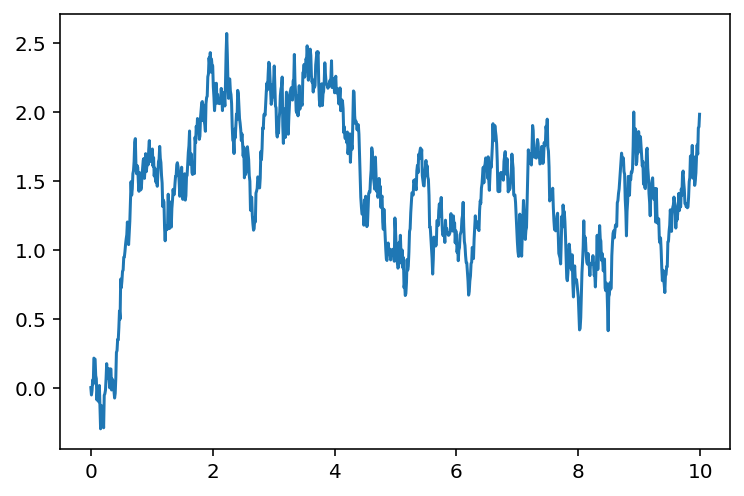

In [37]:
plt.plot(np.arange(0,10,0.01), brownian_motion(0.01,10))
plt.show()

# Question 2.b:

We will generate 10 000 simulation of Bt from 0 to 2. We will estimate the probability of the max between 0 and 2 to greater than or equal to 1.5 as the frequency of simulations having quch a max value.

In [54]:
total_simul = 10000
threshold = 1.5
max_over_threshold = 0
for k in range(total_simul):
    if max(brownian_motion(0.01,2))>=threshold:
        max_over_threshold +=1
estimated_proba = max_over_threshold/total_simul
print("Probability estimation: ", estimated_proba)

Probability estimation:  0.2766


# Question 2.c:

$P\left(\max\limits_{0\leq s\leq2} B_s\geq 1.\right) = 2 P(B_2\geq1.5) = 2P(X\geq1.5)$

Where $X\sim \mathcal{N}(0,2)$

In [55]:
true_proba = 2*(1-norm.cdf(threshold, scale=np.sqrt(2)))
print("True probability: ", true_proba)
print("Relative error", np.abs(true_proba-estimated_proba)/true_proba)

True probability:  0.2888443663464848
Relative error 0.04239087817900176


We observe a low error. However, the approximations made to simulate the Brownian motion (the discretization) and to compute the probability (approximation by a frequency) de not allow us to find the exact result.